In [1]:
import os
import re
import pandas as pd
import numpy as np

from scipy.stats import spearmanr

import matplotlib.pyplot as plt

In [2]:
common_path = '/home/jacs/Documents/DataScience/Personal/'

input_path= 'song_similarity_audio/'

dummy_path = 'song_similarity/'

# As an input there is going to be a list of youtube links that contain audio that can be
# usefull to expand and enrich the database of that particular instrument

# As an input we want a tupple, with the link as first position and instrument as second position


In [2]:
tinysol = ['Bass Tuba', 'French Horn', 'Trombone', 'Trumpet in C', 'Accordion', 'Cello', 
           'Contrabass', 'Viola', 'Violin', 'Alto Saxophone', 'Bassoon', 'Clarinet in Bb',
           'Flute', 'Oboe']

In [3]:
instruments = ['Bass Tuba','French Horn','Trombone','Trumpet in C','Accordion','Cello','Contrabass','Viola','Violin','Alto Saxophone','Bassoon','Clarinet in Bb','Flute','Oboe','Guitar','Electric guitar','Acoustic guitar','Bass guitar','Tapping','Steelpan','Percussion', 'Drum and bass', 'Wind instrument', 'Bowed string instrument', 'Keyboard', 'Single Voice Singing', 'Group Singing', 'Noise']

In [5]:
set(instruments) - set(tinysol)

{'Acoustic guitar',
 'Bass guitar',
 'Bowed string instrument',
 'Drum and bass',
 'Electric guitar',
 'Group Singing',
 'Guitar',
 'Keyboard',
 'Noise',
 'Percussion',
 'Single Voice Singing',
 'Steelpan',
 'Tapping',
 'Wind instrument'}

In [4]:
instruments_reduced = {'woodwind': ['Clarinet in Bb','Flute','Oboe', 'Bassoon', 'Alto Saxophone', 'Wind Instrument'],
                       'brass':['Bass Tuba','French Horn','Trombone', 'Trumpet in C'],
                       'bowed_string_instruments': ['Cello','Viola','Violin', 'Bowed string instrument'],
                       'plucked_string_instruments':['Guitar','Electric guitar','Acoustic guitar', 'Tapping', 'Bass guitar','Contrabass'],
                       'keyboard': ['Keyboard','Accordion'],
                       'percussion': ['Steelpan','Percussion', 'Drum and bass'],
                       'singing': ['Single Voice Singing', 'Group Singing'],
                       'noise': ['Noise']}

In [39]:
brass = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/keyboard.csv')

In [40]:
brass_cols = ['spec_cent', 'spec_bw',
       'rolloff', 'zcr', 'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4',
       'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10',
       'mfccs_11', 'mfccs_12']

In [41]:
instruments = list(dict(brass.groupby(['instrument']).count()['instrument_name']).keys())

In [42]:
brass.groupby(['instrument']).count()['instrument_name']

instrument
4      508888
24    2157417
Name: instrument_name, dtype: int64

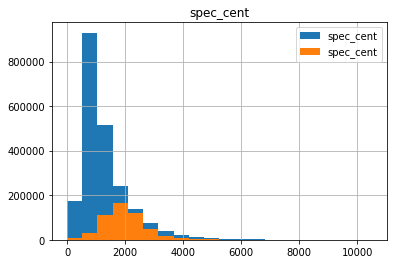

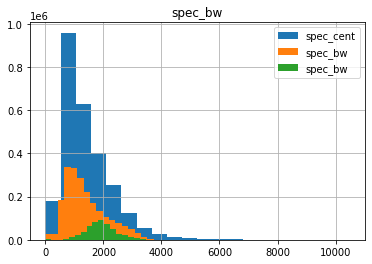

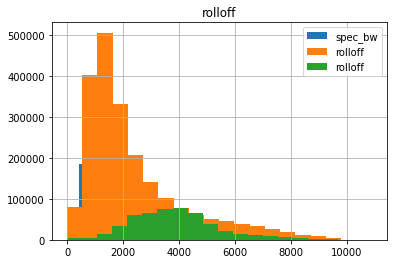

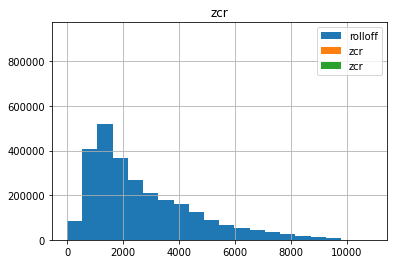

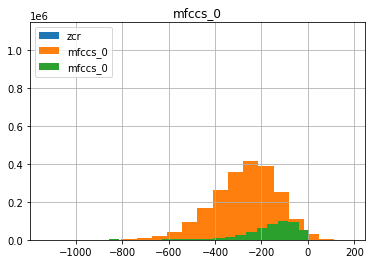

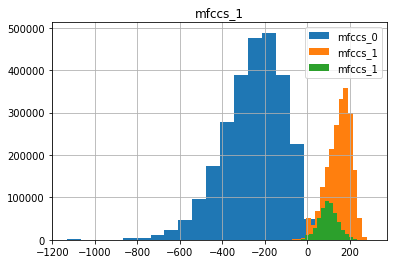

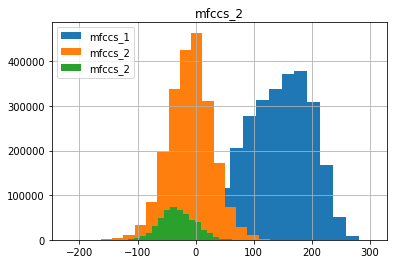

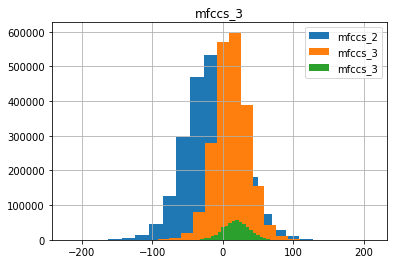

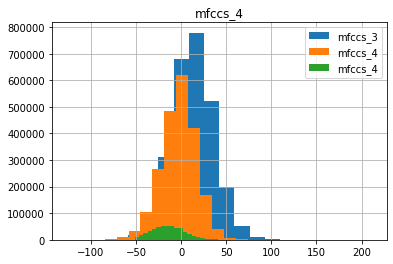

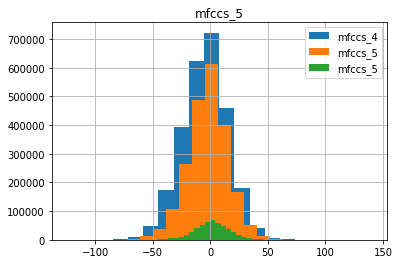

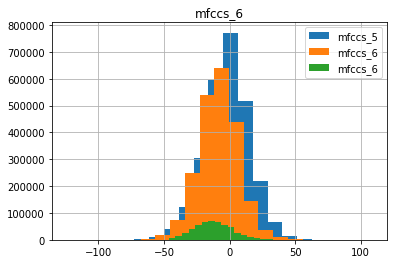

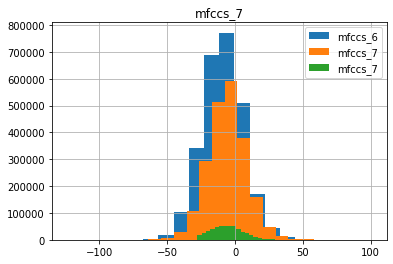

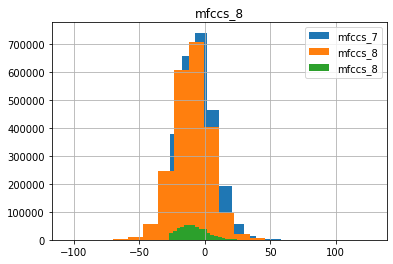

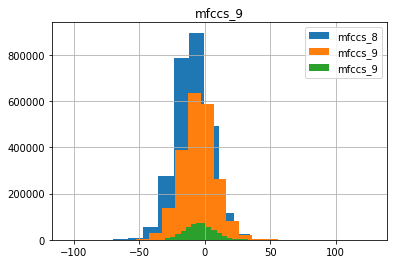

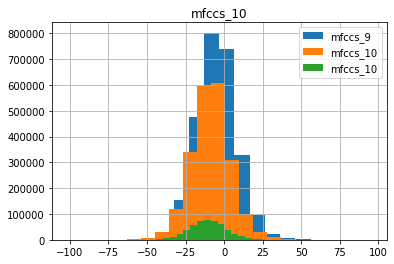

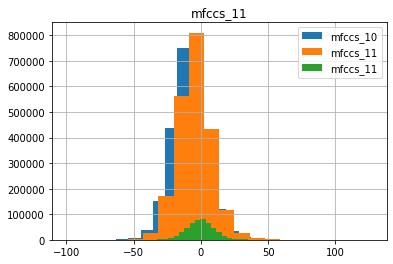

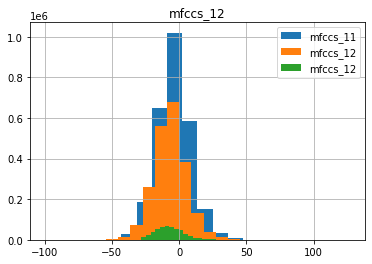

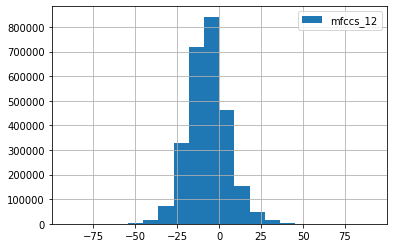

In [44]:
for col in brass_cols:
    for i in range(len(instruments)-1, -1, -1):
        inst = instruments[i]
        df_dumm = brass[brass['instrument'] == inst]
        df_dumm[col].hist(bins=20, legend =True)
    plt.title(col)
    plt.show()
    brass[col].hist(bins=20, legend =True)

In [7]:
sol_path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/'

In [9]:
trumpet_sol = pd.read_csv('/home/jacs/Documents/DataScience/Personal/song_similarity_audio/trumpet_in_c/database_trumpet_in_c_cepstrum_features.csv')
trumpet_youtube = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/original/trumpet_in_c.csv')

In [30]:
def best_examples(df_stats, df_bowed):
    df_bowed_final = pd.DataFrame()
#    cols = list(df_bowed.columns[1:-4])
    cols = ['mfccs_0','mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6','mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']
    for i in range(0,len(cols)):
        col = cols[i]
        stats = df_stats[col].describe()[['mean', 'std']].values
        if i == 0 :
            df_bowed_final = df_bowed[df_bowed[col].apply(lambda x: stats[0]-(3*stats[1]) <= x <= stats[0]+(3*stats[1]))]
            continue
        else:
            df_iter = df_bowed[df_bowed[col].apply(lambda x: stats[0]-(3*stats[1]) <= x <= stats[0]+(3*stats[1]))]
            df_bowed_final = pd.merge(df_bowed_final, df_iter, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
                                                                                        'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
                                                                                        'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
                                                                                        'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
                                                                                        'note_played_x', 'instrument_name_x']]
            df_iter = pd.DataFrame()
    df_bowed_final = df_bowed_final.drop_duplicates()
    df_bowed_final.columns = ['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0',
       'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
       'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
       'instrument', 'note_played', 'instrument_name']
    df_bowed_final = df_bowed_final.reset_index(drop=True)
    return df_bowed_final

In [11]:
trumpet_sol.rename(columns={"rms": "rmeso"}, inplace=True)

In [25]:
df_blop = df_blop[['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr',
       'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5',
       'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11',
       'mfccs_12', 'instrument', 'note_played', 'instrument_name']]

df_blop

,index,rms,spec_cent,spec_bw,rolloff,zcr,mfccs_0,mfccs_1,mfccs_2,mfccs_3,...,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,instrument,note_played,instrument_name
0,0,0.095588,2280.628993,2330.551747,3972.875977,0.068359,-94.09004,98.144680,-27.844193,13.797825,...,-13.951532,-0.300353,3.117880,-3.803352,-7.409647,-5.312292,-8.733051,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
1,1,0.109927,1805.400716,1837.147522,2659.350586,0.095215,-102.74020,125.933624,-38.674600,22.530045,...,-8.751230,-1.909981,-2.848365,-1.171824,-7.570692,-5.133161,-3.542285,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
2,2,0.126121,1451.685109,1294.573269,2368.652344,0.114746,-133.01315,162.483000,-60.116783,35.450474,...,-10.518018,-0.120462,-9.201941,11.951706,-11.754770,-4.179883,-3.798096,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
3,3,0.121579,1301.541284,1283.926483,2228.686523,0.103027,-142.38280,169.067460,-50.352120,29.223404,...,-11.996588,-3.325627,-14.352453,10.552578,-5.471054,-1.212259,-3.687645,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
4,4,0.115666,1271.133701,1205.622794,2045.654297,0.095703,-139.39758,176.242630,-54.734634,17.786297,...,-12.005996,-0.900121,-12.775055,9.150068,-2.135362,1.136873,-3.081768,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224312,426,0.091628,480.157857,462.823334,699.829102,0.035645,-396.53217,202.416730,49.758310,-15.720409,...,-21.646260,-13.771475,-2.479147,-7.534841,-17.361110,-12.114419,-3.018016,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224313,427,0.089518,487.747664,477.845324,721.362305,0.033691,-391.83487,203.681210,44.939300,-19.163733,...,-19.675941,-16.060217,-2.591537,-4.776423,-15.719047,-14.079718,-6.309117,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224314,428,0.083000,501.233507,513.266222,742.895508,0.032227,-390.78146,203.219310,44.437630,-21.431356,...,-18.222637,-16.787262,-0.946304,-4.527922,-14.666221,-11.973747,-8.212722,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224315,429,0.071313,549.096720,681.420739,796.728516,0.030762,-384.98718,204.666410,41.292940,-26.097204,...,-19.157757,-21.089773,-6.839279,-10.329300,-14.746799,-9.841954,-9.425427,1,涙そうそうトロンボーンとホルンの２重奏,french_horn


In [26]:
route1 = '/home/jacs/Documents/DataScience/Personal/data/instruments/original/'
for blop in instruments:
    instrument_name = re.sub(' ','_',str(blop)).lower()
    df_blop = pd.read_csv(route1+'{}.csv'.format(instrument_name))
    df_blop.rename(columns={"indstrument_name": "instrument_name"}, inplace=True)
    dF_blop = df_blop[['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr',
       'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5',
       'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11',
       'mfccs_12', 'instrument', 'note_played', 'instrument_name']]
    df_blop.to_csv(route1 +'{}.csv'.format(instrument_name), index=False)
    print(instrument_name)

bass_tuba
french_horn
trombone
trumpet_in_c
accordion
cello
contrabass
viola
violin
alto_saxophone
bassoon
clarinet_in_bb
flute
oboe
guitar
electric_guitar
acoustic_guitar
bass_guitar
tapping
steelpan
percussion
drum_and_bass
wind_instrument
bowed_string_instrument
keyboard
single_voice_singing
group_singing
noise


In [32]:
for sol in tinysol:
    sol_lower = re.sub(' ','_',str(sol)).lower()
    print(sol_lower)
    df_sol = pd.read_csv(sol_path + sol_lower+'/'+'database_{}_cepstrum_features.csv'.format(sol_lower))
    df_non_sol = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/original/{}.csv'.format(sol_lower))
    print(df_non_sol.shape)
    df_final=best_examples(df_sol, df_non_sol)
    df_final.to_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/{}.csv'.format(sol_lower))
    print(df_final.shape)

bass_tuba
(6673, 24)
(6445, 22)
french_horn
(104150, 24)
(79185, 22)
trombone
(52149, 24)
(32081, 22)
trumpet_in_c
(595539, 23)
(233839, 22)
accordion
(753684, 23)
(508888, 22)
cello
(961606, 23)
(406580, 22)
contrabass
(389453, 23)
(149757, 22)
viola
(27072, 23)
(26658, 22)
violin
(2509149, 23)
(449242, 22)
alto_saxophone
(571409, 23)
(61823, 22)
bassoon
(8569, 23)
(8268, 22)
clarinet_in_bb
(411017, 23)
(241558, 22)
flute
(1108040, 23)
(201714, 22)
oboe
(9151, 23)
(8789, 22)


In [43]:
cols = ['mfccs_0',
       'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
       'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']

for i in range(0,len(cols)):
    col = cols[i]
    stats = trumpet_sol[col].describe()[['mean', 'std']].values
    print(stats)
    if i == 0 :
        df_bowed_final = trumpet_youtube[trumpet_youtube[col].apply(lambda x: stats[0]-(2*stats[1]) <= x <= stats[0]+(2*stats[1]))]
        continue
    else:
        df_iter = trumpet_youtube[trumpet_youtube[col].apply(lambda x: stats[0]-(2*stats[1]) <= x <= stats[0]+(2*stats[1]))]
        df_bowed_final = pd.merge(df_bowed_final, df_iter, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
                                                                                    'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
                                                                                    'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
                                                                                    'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
                                                                                    'note_played_x']]
        df_iter = pd.DataFrame()
df_bowed_final = df_bowed_final.drop_duplicates()
#df_bowed_final.columns = ['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0',
#   'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
#   'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
#   'instrument', 'note_played', 'instrument_name']
df_bowed_final = df_bowed_final.reset_index(drop=True)

[-543.65417004  165.05207269]
[ 3.87051558 66.00441641]
[-79.69119866  27.10541189]
[-14.68940536  13.82081806]
[-30.92931603  13.33380448]
[-4.07228009  6.50786584]
[-17.39283832  12.21363276]
[-5.01914971 16.11623395]
[-5.12774267 16.86346175]
[-1.04662835 16.91469596]
[-7.08354354 18.83143867]
[ 0.83333813 16.65010948]
[-8.7406259  17.61399766]


In [44]:
df_bowed_final

,index_x,rms_x,spec_cent_x,spec_bw_x,rolloff_x,zcr_x,mfccs_0_x,mfccs_1_x,mfccs_2_x,mfccs_3_x,...,mfccs_5_x,mfccs_6_x,mfccs_7_x,mfccs_8_x,mfccs_9_x,mfccs_10_x,mfccs_11_x,mfccs_12_x,instrument_x,note_played_x
0,34,0.018788,1991.073945,2073.200317,3951.342773,0.084473,-257.25958,109.676000,-29.089940,7.030249,...,1.535214,-25.880272,4.971275,-3.113334,1.158227,-9.689935,-11.171938,-4.276636,3,Trumpet_Nerds
1,35,0.026899,2048.829259,2080.779772,4338.940430,0.084473,-247.79716,109.257900,-30.259785,9.755367,...,3.749430,-23.423020,7.565862,-8.182447,1.877331,-9.876662,-20.162552,-3.162625,3,Trumpet_Nerds
2,36,0.071608,1716.816682,1846.600446,3025.415039,0.076660,-219.90921,121.600540,-36.428734,7.869358,...,-3.374462,-29.991116,4.582133,-1.301678,-0.672559,-17.926487,-21.399784,-15.225413,3,Trumpet_Nerds
3,40,0.065519,1443.312172,1816.658055,2691.650391,0.063477,-220.95706,129.033600,-27.135942,12.850897,...,2.516895,-27.530567,4.427068,-13.517498,-8.451872,-24.293148,-19.071556,-18.334896,3,Trumpet_Nerds
4,51,0.041024,1709.581325,1855.233108,3283.813477,0.068848,-222.33102,117.681274,-43.170624,3.979846,...,-4.166517,-6.538762,7.551125,-10.046950,-4.726045,-25.646503,-16.179066,-7.869777,3,Trumpet_Nerds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24525,421,0.050331,1528.264877,1156.022858,2465.551758,0.092285,-395.05008,82.741880,-64.867240,-24.620522,...,5.426882,3.469699,6.320641,-23.186632,-32.638870,-35.841003,-29.010534,-22.659393,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24526,424,0.051795,1550.087542,1180.185985,2465.551758,0.089355,-407.21097,71.570880,-55.570244,-12.172789,...,8.696243,-4.109870,-6.805652,-17.238537,-26.172709,-33.402634,-30.420311,-22.957523,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24527,425,0.052210,1550.189781,1185.328539,2465.551758,0.089844,-399.72420,78.230960,-53.959297,-14.392092,...,-8.478271,-13.990112,-14.977723,-26.543865,-18.006721,-22.137115,-24.747053,-17.047478,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24528,426,0.052856,1570.145954,1203.558216,2465.551758,0.088379,-373.40607,80.136780,-64.436554,-10.579174,...,-15.390429,-21.559431,-13.281731,-18.408428,-11.337223,-18.016560,-19.222810,-10.228198,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...


In [45]:
trumpet_youtube.shape

(856186, 22)

In [5]:
instruments_reduced['woodwind']

['Clarinet in Bb',
 'Flute',
 'Oboe',
 'Bassoon',
 'Alto Saxophone',
 'Wind Instrument']

In [6]:
final_data_path = common_path + dummy_path + 'data/new/' #instrument_folder

In [8]:
input_path = '/home/jacs/Documents/DataScience/Personal/data/instruments/original/'
output_path = '/home/jacs/Documents/DataScience/Personal/data/instruments/new/'

In [ ]:
blop = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/cello.csv')

In [ ]:
best_examples(blop)

In [9]:
for pp in range(0,len(instruments)):
    instrument = instruments[pp]
    instrument_folder = re.sub(' ','_',str(instrument)).lower()#+'/'
    print(instrument_folder)
    df_iteration = pd.read_csv(input_path + instrument_folder+'.csv')
    df_iteration = best_examples(df_iteration)
    df_iteration.to_csv(output_path+'{}.csv'.format(instrument_folder))

bass_tuba
french_horn
trombone
trumpet_in_c
accordion
cello
contrabass
viola
violin
alto_saxophone
bassoon
clarinet_in_bb
flute
oboe
guitar
electric_guitar
acoustic_guitar
bass_guitar
tapping
steelpan
percussion
drum_and_bass
wind_instrument
bowed_string_instrument
keyboard
single_voice_singing
group_singing
noise


In [ ]:
for pp in range(0,len(instruments)):
    if not os.path.exists(final_data_path):
        os.makedirs(final_data_path)
    df_final2 = pd.DataFrame([])
    instrument = instruments[pp]
#        print(instrument)
    instrument_folder = re.sub(' ','_',str(instrument)).lower()#+'/'
    input_data_path = common_path + input_path+ instrument_folder
#    print(os.listdir(path))
    for file in os.listdir(input_data_path):
        if file == '{}_youtube_database_enrichment.csv'.format(instrument_folder):
            continue
        else:
            print(file)
            df_iteration = pd.read_csv(input_data_path+'/'+file)
            df_final2 = pd.concat((df_final2,df_iteration), axis=0).reset_index(drop=True)
    df_final2.to_csv(final_data_path+'{}.csv'.format(instrument_folder))
#    links_audio = list(df_links['youtube_links'])
#        print(instrument,len(links_audio))
#    titles = list(df_links['title'])


In [ ]:
blop = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/accordion.csv')

In [ ]:
stats = blop['mfccs_1'].describe()[['mean', 'std']].values
mffc1 = blop[blop['mfccs_1'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

stats = blop['mfccs_2'].describe()[['mean', 'std']].values
mfcc2 = blop[blop['mfccs_2'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

stats = blop['mfccs_3'].describe()[['mean', 'std']].values
mfcc3 = blop[blop['mfccs_3'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

df_bowed_final = pd.merge(mffc1, mfcc2, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

df_bowed_final = pd.merge(df_bowed_final, mfcc3, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

print(mffc1.shape, mfcc2.shape, mfcc3.shape, df_bowed_final.shape)

In [ ]:
setto = set(mffc1.index) & set(mfcc2.index)

In [ ]:
pd.merge(mffc1, mfcc2, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

In [ ]:
blop.columns

In [ ]:
blop.shape

In [ ]:
best_examples(blop)

In [ ]:
df_final3=df_final2

In [ ]:
blopo

In [ ]:
blopo = df_final.columns
splopo = np.zeros((len(blopo),len(blopo)))
for i in range(0,len(blopo)):
    for j in range(0,len(blopo)):
        corr, _ = spearmanr(df_final2[blopo[i]], df_final2[blopo[j]])
        splopo[i,j] = corr
#print('Spearmans correlation: %.3f' % corr)

splopo

In [ ]:
for i in range(0,len(blopo)):
    print(blopo[i],df_final2[blopo[i]].describe())

In [ ]:
for i in range(0,len(blopo)):
    print(blopo[i],df_final2[blopo[i]].describe(),df_final3[blopo[i]].describe())

In [ ]:
linko1 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/trumpet_in_c/database_trumpet_in_c_cepstrum_features.csv'
linko2 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/alto_saxophone/database_alto_saxophone_cepstrum_features.csv'

In [ ]:
df_final2['mfccs_0'].describe()

In [ ]:
plt.plot(df_final3['rms'],df_final3['mfccs_0'], '.b')
plt.plot(df_final2['rms'],df_final2['mfccs_0'], '+r')

In [ ]:
df_tru = pd.read_csv(linko1)
df_sax = pd.read_csv(linko2)

In [ ]:
df_tru_new = pd.DataFrame([])
df_sax_new = pd.DataFrame([])
for tuu in df_tru.columns:
    df_tru_new[tuu] = df_tru[tuu].describe()
    df_sax_new[tuu] = df_sax[tuu].describe()

In [ ]:
df_tru_new

In [ ]:
df_sax_new

In [ ]:
plt.plot(df_acc['rms'],df_acc['mfccs_0'], '.b')
plt.plot(df_sax['rms'],df_sax['mfccs_0'], '+r')

In [ ]:
path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/'
instrument = 'cello'
os.listdir(path)

In [ ]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

import re
import librosa
import scipy
# for dataframe manipulation
import pandas as pd

In [ ]:
wavo = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/Brass/Trumpet_C/ordinario/TpC-ord-D4-ff-N-T27u.wav'

In [ ]:
Fs, audio = wavfile.read(wavo)

In [ ]:
#mfccs = librosa.feature.mfcc(y=audio, sr=Fs)
#print(mfccs.shape)

In [ ]:
x, fs = librosa.load(wavo)
#librosa.display.waveplot(x, sr=fs)

In [ ]:
xx= x#[:5*fs]

In [ ]:
mfccs = librosa.feature.mfcc(y=xx, sr=fs)#, norm='ortho')#, n_fft=26)
print(mfccs.shape)

In [ ]:
spec_cent = librosa.feature.spectral_centroid(y=xx, sr=fs)
spec_bw = librosa.feature.spectral_bandwidth(y=xx, sr=fs)
rolloff = librosa.feature.spectral_rolloff(y=xx, sr=fs)
zcr = librosa.feature.zero_crossing_rate(xx)

In [ ]:
df = pd.DataFrame()
df['zcr']= zcr[0,:]
for i in range(0,mfccs.shape[0]):
    df['mfccs_{}'.format(i)] = mfccs[i,:]

In [ ]:
df2 = pd.DataFrame()

In [ ]:
pd.concat((df,df2), axis=0)

In [ ]:
np.mean(mfccs[:,0])

In [ ]:
plt.plot(np.log(xx))

In [ ]:
meano = []

for i in range(0,mfccs.shape[1]):
    meano.append(np.mean(mfccs[:,i]))

In [ ]:
plt.plot(meano)
#    plt.show()
#    plt.xlim(0,50)
#    plt.ylim(-350,-300)

In [ ]:
sp = scipy.fft.fft(xx)
freq = scipy.fft.fftfreq(len(xx),fs)

In [ ]:
plt.plot(freq,sp)
plt.xlim(0,0.00002)

In [ ]:
plop = len(xx)
plop2= mfccs.shape[1]

print((plop/plop2)/fs)

In [ ]:
mfccs[:10,:].shape

In [ ]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [ ]:
mfccs[0]`

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))


In [ ]:
flop = 'TOP_10_MOST_POPULAR_TRUMPET_SONGS_(with_Sheet_Music_Notes)'

In [ ]:
re.sub('[)!$/(]','',flop)

In [ ]:
Fs, audio = wavfile.read('The_Most_Beautiful_Trumpet_Solo.wav')

In [ ]:
#top_2_idx = np.argsort(sp)[-40:]
#listo_freq = [freq[i] for i in top_2_idx]

In [ ]:
# Creates different chunks of data from a signal
# Includes half the past chunk
# Say, you have a 1s signal, you want windows of 0.25s 
# with this methodology you will have each window that includes half of the past window

def chunks(xs, n):
    # xs: signal
    # n: times you want to split the signal
    # len(return): n(even): 2n - 1
    #            : n(odd): 2n +1
    ms = int(len(xs)/n)
    return list(xs[i-int(ms/2):i+int(ms/2)] for i in range(int(ms/2), len(xs), int(ms/2)))
#    return list(xs[i:i+ms] for i in range(0, len(xs), ms))

In [ ]:
def suma_repetidos(freq_int, sp):
    sp_int = []
    frequ_int = []
    for i in range(1,len(freq_int)):
        frequ = int(freq_int[i-1])
        frequ_1 = int(freq_int[i])
        try:
            frequ_2 = int(freq_int[i+1])
        except:
            frequ_2 = int(freq_int[-1])
        if i == 1:
            frequ_int.append(frequ)
        if frequ == frequ_1:
            try:
                sp_new = sp_int[-1] + sp[i+1]
                sp_int.pop()
                sp_int.append(sp_new)
#                print("blop")
            except:
                sp_new = sp[i] + sp[i+1]
                sp_int.append(sp_new)
#                print("blopo")
            if frequ_int[-1] != frequ_1:
                frequ_int.append(frequ_1)
        else:
            sp_new = sp[i]
            sp_int.append(sp_new)
            frequ_int.append(frequ_1)
#            print("plopo")
    return frequ_int, sp_int

In [ ]:
def exist_or_zero(freq_new,sp,freq_final):
    sp_final = []
    maxxo = max(sp)
    for freq in freq_final:
        if freq in freq_new:
            spe = sp[list(freq_new).index(freq)]
            sp_final.append(spe/maxxo)
        else:
            sp_final.append(0)
    return sp_final

In [ ]:
def extract_peaks_and_freqs(aud, Fs):
    sp = scipy.fft.fft(aud)
    freq = scipy.fft.fftfreq(len(aud),Fs)
    freq_sci= scipy.signal.find_peaks(sp)[0]
    sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
    freq_gaps = np.arange(0,6750,1)
    sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
    freq_final, _ = scipy.signal.find_peaks(sp_final)
    pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
    sp_sorted = sorted(pikos, reverse= True)
    freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]
    return sp_sorted, freq_sorted, sp_final, freq_final

In [ ]:
def final_data_collection(freq_sorted, pikos_sorted, n, m, note_played):
    df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': m, 'note_played': []})
    frequs_sp = []
    for i in range(0,len(freq_sorted[:n])):
        freq_1, sp_1 = freq_sorted[i], pikos_sorted[i]
        frequs_sp.append((freq_1, sp_1))
        for j in range(0,len(freq_sorted[:n])):
            freq_2, sp_2 = freq_sorted[j], pikos_sorted[j]
            if (freq_2, sp_2) in frequs_sp:
                continue
            else:
                distance = np.sqrt((freq_2 - freq_1)**2 + (sp_2 - sp_1)**2)
                df_iteration = pd.DataFrame({'peak_1':[(freq_1, sp_1)], 'peak_2':[(freq_2, sp_2)], 'Magnitude difference': [distance] ,'instrument': 1, 'note_played': [note_played]})
                df_final = df_final.append(df_iteration)
    return df_final

In [ ]:
common_path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/'
df_into = pd.read_csv(common_path+'TinySOL_metadata.csv')
df_into= df_into[df_into['Needed digital retuning']]
instruments = df_into['Instrument (in full)'].unique()

In [ ]:
instruments

In [ ]:
instruments_test = ['Trombone', 'Trumpet in C']
outputs = ['database_trombone_10_peaks', 'database_trumpet_10_peaks']

In [ ]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': [], 'note_played': []})

i=0

for woko in df_into[df_into['Instrument (in full)'] == 'Trumpet in C']['Path']:
    wavo = common_path + woko
    titulo = woko.split('/')[-1]
#    file_1 = file.format(audio_1)
#    wavo = path + file_1
    Fs, audio = wavfile.read(wavo)
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
        length_2 = aud.shape[0] / Fs
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        pikos_sorted, freq_sorted, sp_final, peaks  = extract_peaks_and_freqs(aud, Fs)
        print(i)
        i+=1
        df_final_2 = final_data_collection(freq_sorted, pikos_sorted, 10, 1, titulo).reset_index(drop=True)
        df_final = df_final.append(df_final_2).reset_index(drop=True)
df_final=df_final.reset_index(drop=True)
df_final.to_csv(output[1]+'.csv', index=False)
#################################
#        plt.specgram(aud, Fs=Fs)
#        plt.xticks(time_cnk)    
#        plt.ylim(0,5000)
#        plt.title(titulo)
#        plt.show()
#        time = np.linspace(0., length_2, aud.shape[0])
#        plt.plot(time, aud)
#        plt.title('Original signal')
#        plt.show()
#        plt.plot(peaks, [sp_final[i] for i in peaks])
#        plt.plot(freq_sorted[:10], pikos_sorted[:10],'x')
#        plt.title('Final frequencies and intensities')
#        plt.show()
#        ss = np.fft.ifft(sp_final)
#        time = np.linspace(0., length_2, len(sp_final))
#        plt.plot(time, ss)
#        plt.title('Reconstruccion with data manipulation')
#        plt.show()
#################################

In [ ]:
df_final

In [ ]:
df_final=df_final.reset_index(drop=True)

In [ ]:
df_final.to_csv('database_trumpet_10_peaks.csv', index=False)

In [ ]:
pd.read_csv('database_trumpet_freq.csv')

In [ ]:
max(freq_sci)

In [ ]:
wavfile.write("example.wav", Fs, ss.astype(np.int16))

In [ ]:
sp = scipy.fft.fft(aud)
freq = scipy.fft.fftfreq(len(aud),Fs)
freq_sci= scipy.signal.find_peaks(sp)[0]
sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
freq_gaps = np.arange(0,6750,1)
sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
freq_final, _ = scipy.signal.find_peaks(sp_final)
pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
sp_sorted = sorted(pikos, reverse= True)
freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]

In [ ]:
plt.plot(freq_gaps, sp_final)
plt.plot(freq_sorted[:15],sp_sorted[:15], 'x')

# Usando numpy

In [ ]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'note_played':[], 'frequencies':[], 'intensities':[], 'instrument': []})

for audio_1 in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        sp_final = np.fft.fft(aud)
        freq_final = np.fft.fftfreq(aud.shape[-1], d=(1/Fs))
        plt.specgram(aud, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        freq_positive = [(freq_final[i], sp_final[i]) for i in range(0,len(freq_final)) if freq_final[i]>=0]
        freq_final = [freq_positive[i][0] for i in range(0,len(freq_positive))]
        sp_final = [freq_positive[i][1] for i in range(0,len(freq_positive))]
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.title('Original signal')
        plt.show()
        plt.plot(freq_final,sp_final)
        plt.title('Final frequencies and intensities')
        plt.show()
        ss = np.fft.ifft(sp_final)
        time = np.linspace(0., length, len(sp_final))
        plt.plot(time, ss)
        plt.title('Reconstruccion with data manipulation')
        plt.show()
        df_iteration = pd.DataFrame({'note_played': file_1, 'frequencies':[freq_final], 'intensities':[sp_final], 'instrument': 1})
        df_final = df_final.append(df_iteration)

In [ ]:
df_final

# Usando spectrogram de matplotlib

In [ ]:
for audio in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length*8))
    print(f"length = {length}s")
    for aud in audio_chunks[1:-1]:
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        length = aud.shape[0] / Fs
        first = aud[:int(Fs*length)]
        powerSpectrum, frequenciesFound, time2, imageAxis = plt.specgram(first, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.show()
        print(frequenciesFound)
    #    poweroso = [np.average(powerSpectrum[i,:]) for i in range(0,len(powerSpectrum))]
    #    print(len(poweroso))
    #    ss = np.fft.ifft(poweroso)
        plt.plot(frequenciesFound,powerSpectrum)
        plt.xlim(0,2500)
        plt.title('frequencies')
        plt.show()
    #    plt.plot(ss.real)
    #    plt.title('Reconstruccion')
    #    plt.show()
    #    plt.savefig('{}.png'.format(audio))

In [ ]:
len(frequenciesFound)

In [ ]:
powerSpectrum